In [1]:
pip install nltk gensim


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/d3/68/373da90a8b241e2603707c7aa4c8f47829a72729c6e9497f2bc604fa6a6a/gensim-4.3.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/fc/d9/d97f1db64b09278aba64e8c81b5d322d436132df5741c518f3823824fae0/smart_open-6.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 1.3 MB/s eta 0:00:19
   ---------------------------------------- 0.1/24.0 MB 1.4 MB/s eta 0:00:17
   ---------------------------------------- 0.3/24.0 MB 2.0 MB/s eta 0:00:13
    --------------------------------------- 0.5/24.0 MB 2.7 MB/s eta 0:00:09
   - -------------------------------------- 0.6/24.0 MB 2.8 MB/s eta 0:00:09
   - -------------------------------------- 1.0/24.0 MB 3.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.2/24.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\100ab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\100ab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import pandas as pd
import numpy as np
import sklearn
import gensim
import joblib

# After Installing NLTK & Gensim and then importing all libraries for future tasks
print("Libraries imported successfully!")


Libraries imported successfully!


In [7]:
# Load the dataset for SMS Spam: spam.csv
data = pd.read_csv(r'C:\CodSoft_Projects\archive\spam.csv' , encoding='latin-1')

# Display the first few rows
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [9]:
# Load the dataset for SMS Spam: spam.csv
data = pd.read_csv(r'C:\CodSoft_Projects\archive\spam.csv' , encoding='iso-8859-1')

# Display the first few rows
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [10]:
# Dropping columns Unnamed: 2, Unnamed: 3, Unnamed: 4, Since those columns didn't provide any values i.e NaN

data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [11]:
# Rename columns v1 to label and v2 to message
data = data.rename(columns={'v1': 'label', 'v2': 'message'})

In [12]:
# Convert the labels into a binary format (i.e., 1 for spam and 0 for ham).
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [13]:
print(data.isnull().sum())

label      0
message    0
dtype: int64


In [14]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
"""

This represents how the messages are cleaned and only indicated in two columns 
one with label as 0 or 1 for Spam and Not-Spam respectively.

The Messages Column contains the messages. 

"""


'\n\nThis represents how the messages are cleaned and only indicated in two columns \none with label as 0 or 1 for Spam and Not-Spam respectively.\n\nThe Messages Column contains the messages. \n\n'

In [16]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenization
    words = word_tokenize(text)
    # Removing stopwords and stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

data['cleaned_message'] = data['message'].apply(clean_text)


In [17]:
data.head()

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


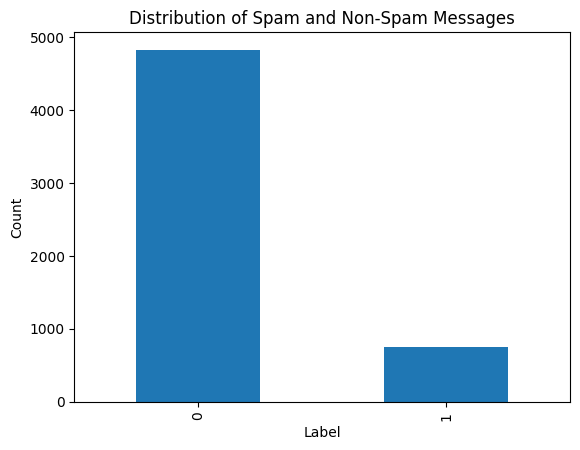

In [18]:
import matplotlib.pyplot as plt

data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  #Optimal value
X = vectorizer.fit_transform(data['cleaned_message'])

# This is the feature set
X = X.toarray()

# This is the target variable
y = data['label'].values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Training the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
from sklearn.svm import SVC

# Training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = svm_model.predict(X_test)

# Evaluating the Model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100], 
    'kernel': ['rbf', 'poly', 'sigmoid'] 
}

# Create a GridSearchCV object

"""

This is chosen as 2, 
which means each set of parameters is trained and evaluated 2 times
on different subsets of the training data. 
 

Verbose is set to 2 to see twice more information during the training process.

"""

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)  

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print out the best parameters
print("Best Parameters found: ", grid_search.best_params_)

# T0 Use the best estimator to make predictions
y_pred_best = grid_search.predict(X_test)

# Evaluate the best model
print("Accuracy after hyperparameter tuning:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  43.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  37.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  35.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.9s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  14.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  14.6s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=  10.2s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=  10.1s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=  10.3s
[CV] END ..................C=0.1, gamma=auto, k

In [24]:
"""
Interpretation of Results:

Best Parameters: The best parameters found are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. 
This means that for this trained dataset, 
an SVM model with an RBF kernel, 
a regularization parameter C of 10, and a gamma value of 0.1 yields the best performance.

Accuracy Improvement: The accuracy after hyperparameter tuning is 0.9803, 
which is an improvement from the previous accuracy of 0.9722. 
This indicates that the tuning process has successfully found a better set of parameters for the model.

Results:

For class 0 (non-spam), 
the precision is 0.98, and the recall is 1.00, resulting in an F1-score of 0.99. 
This is excellent performance, indicating that the model is very effective at identifying non-spam messages.

For class 1 (spam), 
the precision is 0.98, and the recall is 0.87, with an F1-score of 0.92. 
This is also a strong result, though the slightly lower recall suggests that 
there are some spam messages that the model fails to identify.


So Our Overall Performance: The weighted averages of precision, recall, and F1-score are all around 0.98, 
indicating a highly effective model across both classes.

"""

"\nInterpretation of Results:\n\nBest Parameters: The best parameters found are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. \nThis means that for this trained dataset, \nan SVM model with an RBF kernel, \na regularization parameter C of 10, and a gamma value of 0.1 yields the best performance.\n\nAccuracy Improvement: The accuracy after hyperparameter tuning is 0.9803, \nwhich is an improvement from the previous accuracy of 0.9722. \nThis indicates that the tuning process has successfully found a better set of parameters for the model.\n\nResults:\n\nFor class 0 (non-spam), \nthe precision is 0.98, and the recall is 1.00, resulting in an F1-score of 0.99. \nThis is excellent performance, indicating that the model is very effective at identifying non-spam messages.\n\nFor class 1 (spam), \nthe precision is 0.98, and the recall is 0.87, with an F1-score of 0.92. \nThis is also a strong result, though the slightly lower recall suggests that \nthere are some spam messages that the model fail

In [38]:
from joblib import dump

# Save the trained model
dump(svm_model, 'sms_spam_classifier.joblib')

# Save the transformer
joblib.dump(vectorizer, 'tfidf_transformer.joblib')


['tfidf_transformer.joblib']

In [41]:
# Create the preprocess function to clean the input text from the user in the same way the model is trained on. 
def preprocess_message(message):
    # Lowercasing
    message = message.lower()
    # Removing punctuation
    message = "".join([char for char in message if char not in string.punctuation])
    # Tokenization
    words = word_tokenize(message)
    # Removing stopwords and stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Create the Prediction function. 

def predict_spam(message):
    processed_message = preprocess_message(message)

    # Load the saved model and transformer
    model = joblib.load('sms_spam_classifier.joblib')
    tfidf_transformer = joblib.load('tfidf_transformer.joblib')

    # Transform the processed message
    transformed_message = tfidf_transformer.transform([processed_message])

    # Convert sparse matrix to dense
    dense_message = transformed_message.toarray()

    # Make a prediction
    prediction = model.predict(dense_message)

    return 'Spam' if prediction[0] == 1 else 'Not Spam'




In [34]:
def get_user_input_and_predict():
    message = input("Enter a message to check if it's spam or not: ")
    result = predict_spam(message)
    print(f"The message is: {result}")



In [42]:
# Using the function to predict messages as spam or not spam. 
# Test 1 : Input : Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now.
get_user_input_and_predict()


The message is: Spam


In [44]:
# Test 1 : Input : Hey, are we still meeting for lunch tomorrow? Don't forget to bring the book I lent you.
get_user_input_and_predict()

The message is: Not Spam
